In [58]:
import numpy as npa
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [59]:
! pip install openpyxl

In [60]:
raw = pd.read_excel("Downloads/Data_Train.xlsx")
# export to csv
raw.to_csv('./train.csv')

In [61]:
raw_test = pd.read_excel("Downloads/Test_set.xlsx")
raw_test.to_csv('./test.csv')

In [62]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [63]:
data.shape, test.shape

((10683, 12), (2671, 11))

In [64]:
pd.set_option('display.max_columns', None)
data.head(4)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [65]:
data = data.drop('Unnamed: 0', axis=1)
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [66]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [67]:
cat = [i for i in data.columns if data[i].dtype == object]
num = [i for i in data.columns if data[i].dtype != object]

In [68]:
cat

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [69]:
data.shape

(10683, 11)

In [70]:
data['Date_of_Journey'].dtype

dtype('O')

In [71]:
data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [72]:
data.dropna(inplace=True)
data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], 
                                         infer_datetime_format=True)
# data = data.drop('Unnamed: 0', axis=1)
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [74]:
data['Day of Journey'] = data['Date_of_Journey'].dt.day
data['Month of Journey'] = data['Date_of_Journey'].dt.month
data['Year of Journey'] = data['Date_of_Journey'].dt.year
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [75]:
data.drop('Date_of_Journey', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [76]:
data['Year of Journey'].value_counts()

2019    10682
Name: Year of Journey, dtype: int64

In [77]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], 
                                         infer_datetime_format=True)
data['Dep_Time'].dtype

dtype('<M8[ns]')

In [78]:
data['Hour of Departure'] = data['Dep_Time'].dt.hour
data['Minute of Departure'] = data['Dep_Time'].dt.minute
# dropping original departure time feature
data.drop('Dep_Time', axis=1, inplace=True)
data.head(4)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5


In [79]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], 
                                         infer_datetime_format=True)
data['Arrival Hour'] = data.Arrival_Time.dt.hour
data['Arrival Minute'] = data.Arrival_Time.dt.minute
data.drop('Arrival_Time', axis=1, inplace=True)
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [80]:
duration = list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))    

In [81]:
data['Duration Hours'] = duration_hrs
data['Duration Mins'] = duration_mins
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [82]:
data.drop('Duration', axis=1, inplace=True)
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [83]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

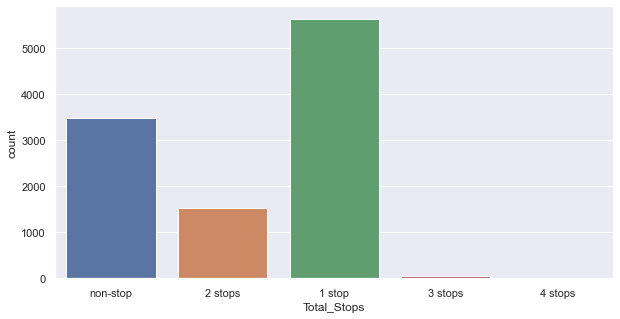

In [84]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(x=data.Total_Stops)

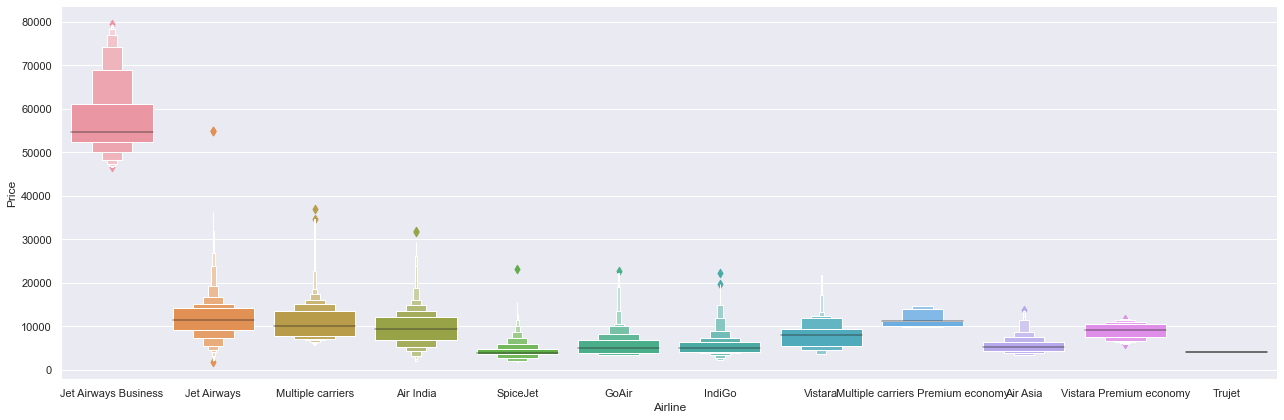

In [85]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.catplot(y='Price', x='Airline', data=data.sort_values("Price", ascending=False),
           kind='boxen', height=6, aspect=3)

In [86]:
airline_names = data[['Airline']]
airline_names = pd.get_dummies(airline_names, drop_first=True)
airline_names.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


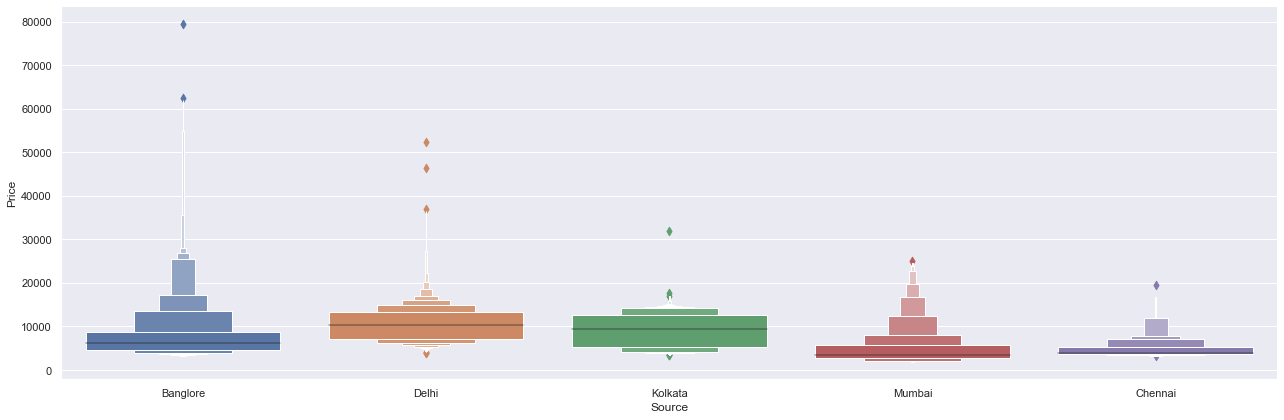

In [87]:
sns.catplot(y='Price', x='Source', data=data.sort_values("Price", ascending=False),
           kind='boxen', height=6, aspect=3)

In [88]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [89]:
source = data[['Source']]
source = pd.get_dummies(source)
source.head(4)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0


In [90]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [91]:
destination = data[['Destination']]
destination = pd.get_dummies(destination)
destination.head(3)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0


In [92]:
destination.shape

(10682, 6)

In [93]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


In [94]:
data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0


In [95]:
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0


In [96]:
data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
# merge all dataframes in a single dataframe
train_data = pd.concat([data, airline_names, source, destination], axis=1)
train_data.head(4)

,Total_Stops,Price,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [97]:
train_data.shape

(10682, 33)

In [98]:
test.head(3)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [99]:
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], 
                                         infer_datetime_format=True)
test.drop(['Unnamed: 0', 'Route', 'Additional_Info'], axis=1, inplace=True)
test['Day of Journey'] = test['Date_of_Journey'].dt.day
test['Month of Journey'] = test['Date_of_Journey'].dt.month
test['Year of Journey'] = test['Date_of_Journey'].dt.year
test.drop('Date_of_Journey', axis=1, inplace=True)
test['Dep_Time'] = pd.to_datetime(test['Dep_Time'], 
                                         infer_datetime_format=True)
test['Hour of Departure'] = test['Dep_Time'].dt.hour
test['Minute of Departure'] = test['Dep_Time'].dt.minute
# dropping original departure time feature
test.drop('Dep_Time', axis=1, inplace=True)
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'], 
                                         infer_datetime_format=True)
test['Arrival Hour'] = test.Arrival_Time.dt.hour
test['Arrival Minute'] = test.Arrival_Time.dt.minute
test.drop('Arrival_Time', axis=1, inplace=True)
duration = list(test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1])) 
    

In [100]:
test['Duration Hours'] = duration_hrs
test['Duration Mins'] = duration_mins
airline_names = test[['Airline']]
airline_names = pd.get_dummies(airline_names, drop_first=True)

source_test = test[['Source']]
source_test = pd.get_dummies(source_test, drop_first=True)

dest_test = test[['Destination']]
dest_test = pd.get_dummies(dest_test, drop_first=True)

In [101]:
test.drop(['Airline', 'Source', 'Destination', 'Duration'], axis=1, inplace=True)
test.head(3)

,Total_Stops,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,1 stop,6,6,2019,17,30,4,25,10,55
1,1 stop,5,12,2019,6,20,10,20,4,0
2,1 stop,21,5,2019,19,15,19,0,23,45


In [102]:
test_data = pd.concat([test, airline_names, source_test, dest_test], axis=1)
test_data['Duration Hours']

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration Hours, Length: 2671, dtype: int64

In [103]:
test_data['Total_Stops'] = test_data['Total_Stops'].replace({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})
test_data.shape

(2671, 29)

In [104]:
test_data.head(4)

,Total_Stops,Day of Journey,Month of Journey,Year of Journey,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [105]:
X = train_data.drop('Price', axis=1)
Y = train_data['Price']
X.shape, Y.shape

((10682, 32), (10682,))

In [106]:
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                                  Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(8545, 32)
(2137, 32)
(8545,)
(2137,)


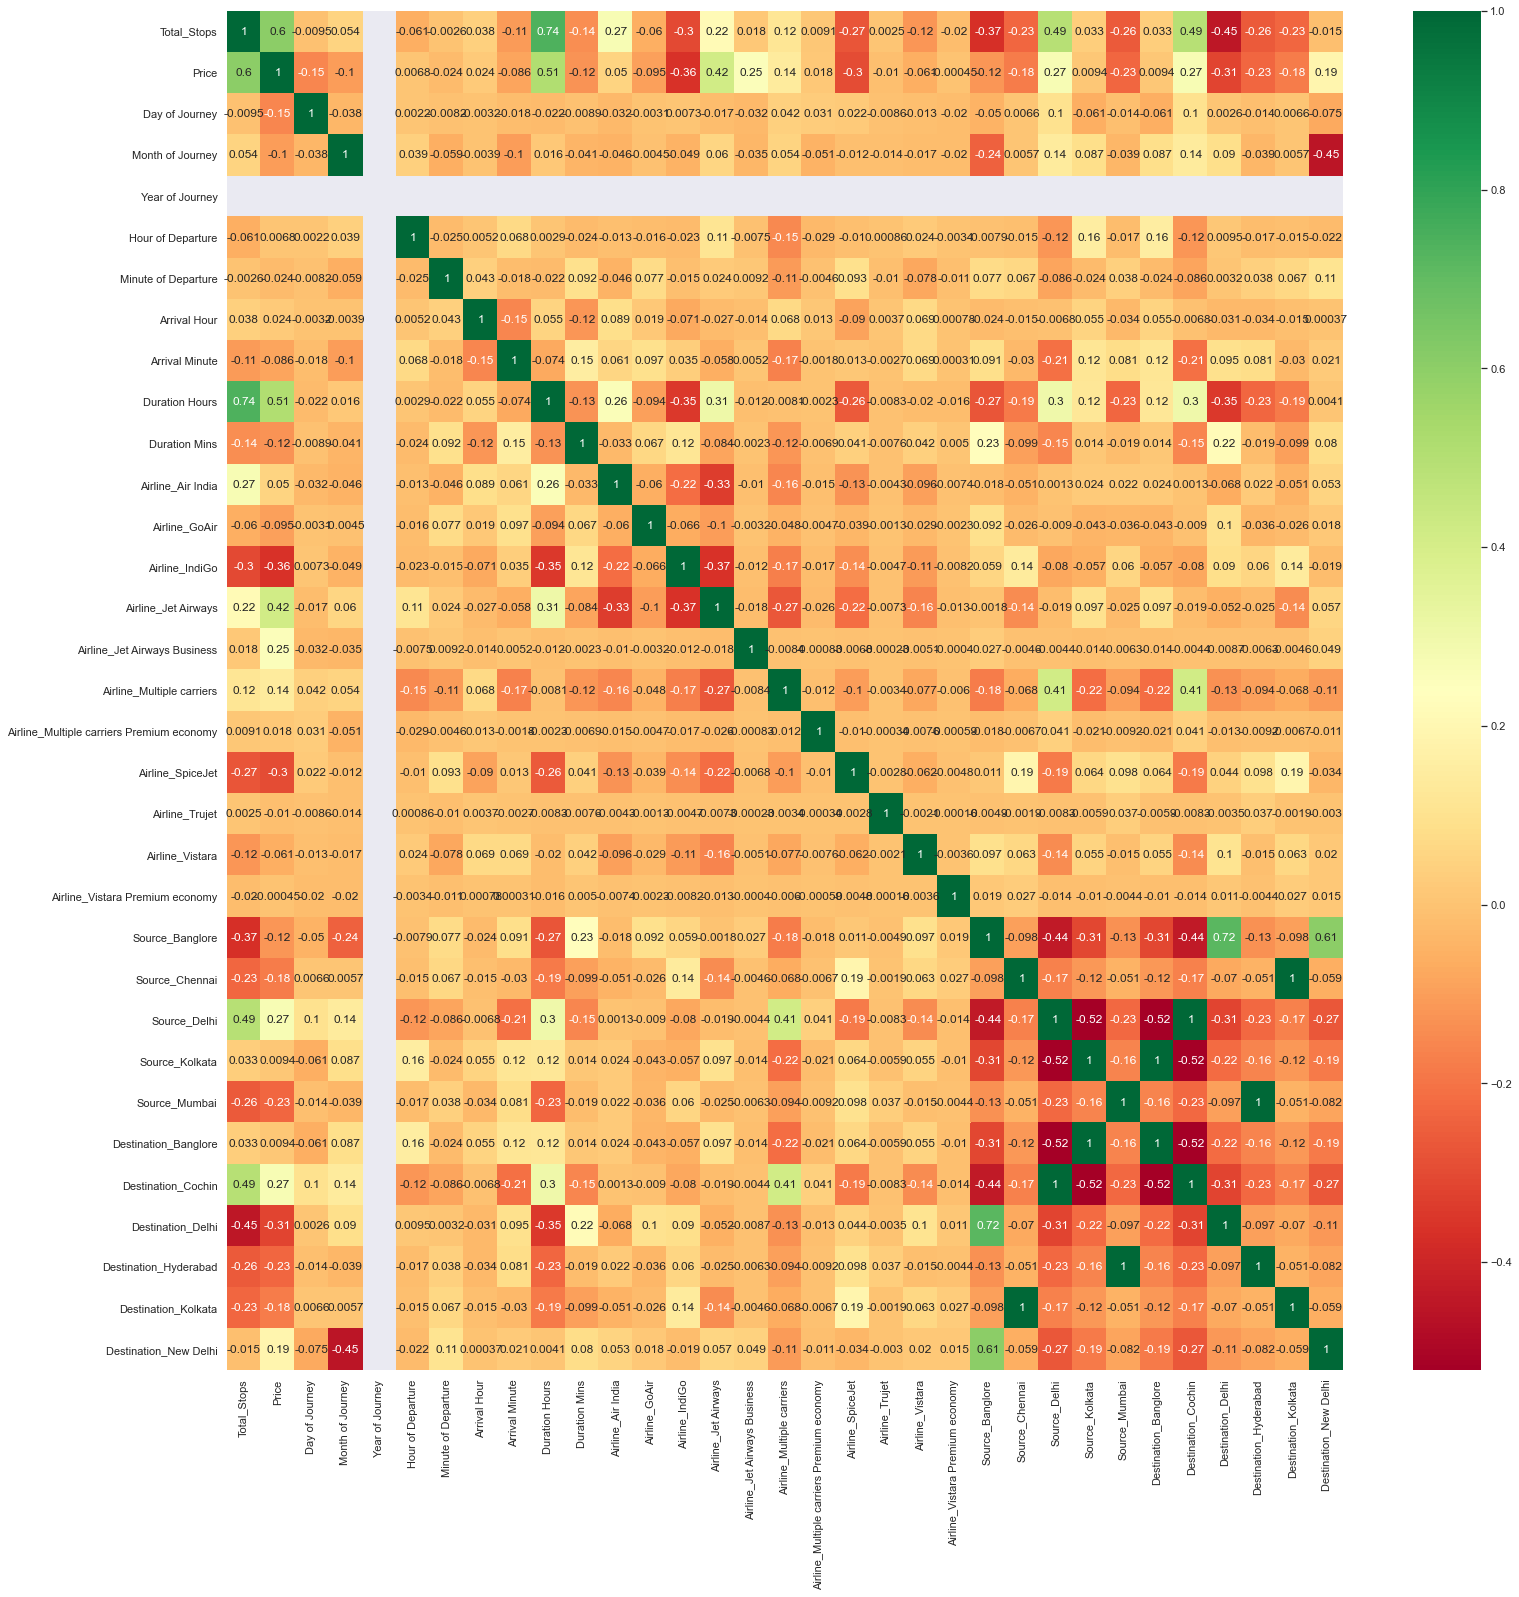

In [107]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))
sns.set(rc={'figure.figsize':(25, 25)})
sns.heatmap(train_data.corr(),
           annot=True, cmap='RdYlGn')
plt.show()

In [108]:
%%time
rf = RandomForestRegressor()
rf.fit(X, Y)

Wall time: 5 s


RandomForestRegressor()

In [109]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

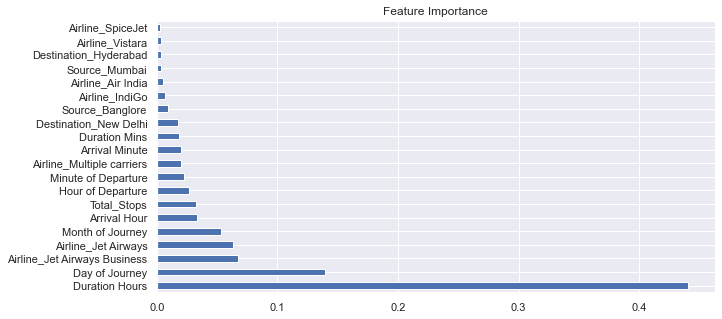

In [110]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importance')
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [111]:
print('Accuracy of RF on train: %.4f' % rf.score(X_train, Y_train))
print('Accuracy of RF on validation: %.4f' % rf.score(X_val, Y_val))

Accuracy of RF on train: 0.9490
Accuracy of RF on validation: 0.9507


In [112]:
y_pred = rf.predict(X_val)

In [113]:
sns.displot(Y_val-y_pred)

AttributeError: module 'seaborn' has no attribute 'displot'

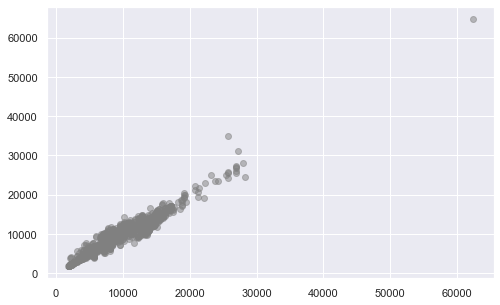

In [114]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_val, y_pred, alpha=0.5, color='grey')

In [115]:
print('R2 Score of Model: %.4f' % r2_score(Y_val, y_pred))

R2 Score of Model: 0.9507


In [116]:
import math

def show_eror():
    print('Mean Squared Error: %.3f' % MSE(Y_val, y_pred))
    print('Mean Absolute Error: %.3f' % MAE(Y_val, y_pred))
    print('Root Meab Squared Error: %.3f' % math.sqrt(MSE(Y_val, y_pred)))
    print('Root Meab Squared Error: %.3f' % math.sqrt(MAE(Y_val, y_pred)))
show_eror()

Mean Squared Error: 950110.984
Mean Absolute Error: 566.733
Root Meab Squared Error: 974.736
Root Meab Squared Error: 23.806


In [118]:
import pickle
from pickle import load


In [119]:
file = open('flight.pkl', 'wb')
pickle.dump(rf, file)

In [120]:
model = open('./flight.pkl', 'rb')
rf_model = load(model)

In [121]:
rf_model

RandomForestRegressor()

In [122]:
prediction = rf_model.predict(X_val)
prediction

array([ 8783.69      , 16347.196     , 12768.31490476, ...,
        3650.95      ,  5996.42      , 10630.76      ])

In [123]:
Y_val_ = Y_val.to_numpy()

In [125]:
#Showing the Predictions Made by Model

In [126]:
df = pd.DataFrame({'Actual Price': Y_val, 'Predicted Price': y_pred})
df.head(10)

,Actual Price,Predicted Price
10435,8996,8783.690000
8619,15400,16347.196000
6445,10844,12768.314905
3159,4423,4307.360000
9866,13339,11135.628333
4680,17234,16721.185833
9981,9627,9754.960000
3238,11507,12482.964930
8315,9237,9553.860000
462,4957,4991.430000


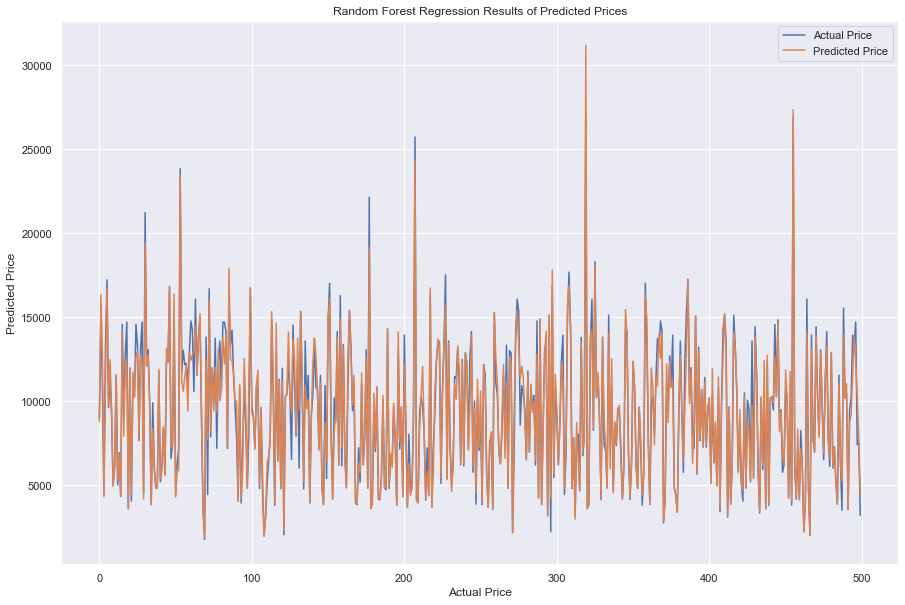

In [127]:
plt.figure(figsize=(15, 10))
plt.title('Random Forest Regression Results of Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot(Y_val_[:500], label='Actual Price')
plt.plot(y_pred[:500], label='Predicted Price')
plt.legend()